In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd

In [4]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [5]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [6]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [7]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [8]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [9]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [10]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [11]:
# retrive column names in table measurement
inspector = inspect(engine)
m_columns = inspector.get_columns('measurement')
for m in m_columns:
    print(m['name'], m["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [12]:
# retrive column names in table station
s_columns = inspector.get_columns('station')
for s in s_columns:
    print(s['name'], s["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


# Exploratory Climate Analysis

In [13]:
## Design a query to retrieve the last 12 months of precipitation data and plot the results

#1. Retrieve data from engine
data = engine.execute("SELECT date, prcp FROM Measurement")
for record in data:
    print(record)


('2010-01-01', 0.08)
('2010-01-02', 0.0)
('2010-01-03', 0.0)
('2010-01-04', 0.0)
('2010-01-06', None)
('2010-01-07', 0.06)
('2010-01-08', 0.0)
('2010-01-09', 0.0)
('2010-01-10', 0.0)
('2010-01-11', 0.01)
('2010-01-12', 0.0)
('2010-01-14', 0.0)
('2010-01-15', 0.0)
('2010-01-16', 0.0)
('2010-01-17', 0.0)
('2010-01-18', 0.0)
('2010-01-19', 0.0)
('2010-01-20', 0.0)
('2010-01-21', 0.0)
('2010-01-22', 0.0)
('2010-01-23', 0.0)
('2010-01-24', 0.01)
('2010-01-25', 0.0)
('2010-01-26', 0.04)
('2010-01-27', 0.12)
('2010-01-28', 0.0)
('2010-01-30', None)
('2010-01-31', 0.03)
('2010-02-01', 0.01)
('2010-02-03', None)
('2010-02-04', 0.01)
('2010-02-05', 0.0)
('2010-02-06', 0.0)
('2010-02-07', 0.0)
('2010-02-08', 0.0)
('2010-02-09', 0.0)
('2010-02-11', 0.0)
('2010-02-12', 0.02)
('2010-02-13', 0.01)
('2010-02-14', 0.0)
('2010-02-15', 0.0)
('2010-02-16', 0.0)
('2010-02-17', 0.0)
('2010-02-19', None)
('2010-02-20', 0.03)
('2010-02-21', 0.0)
('2010-02-22', 0.0)
('2010-02-23', 0.0)
('2010-02-24', 0.0)
('20

('2014-01-27', 0.14)
('2014-01-28', 0.02)
('2014-01-29', 0.27)
('2014-01-30', 0.04)
('2014-01-31', 0.0)
('2014-02-01', 0.22)
('2014-02-02', 0.38)
('2014-02-03', 0.0)
('2014-02-04', 0.5)
('2014-02-05', 0.23)
('2014-02-06', 0.08)
('2014-02-07', 0.03)
('2014-02-08', 0.0)
('2014-02-09', 0.0)
('2014-02-10', 0.0)
('2014-02-11', 0.0)
('2014-02-12', 0.0)
('2014-02-13', 0.0)
('2014-02-14', 0.0)
('2014-02-15', 0.01)
('2014-02-16', 0.0)
('2014-02-17', 0.35)
('2014-02-18', 0.03)
('2014-02-19', 0.0)
('2014-02-20', 0.0)
('2014-02-21', 0.0)
('2014-02-22', 0.0)
('2014-02-23', 0.0)
('2014-02-24', 0.0)
('2014-02-25', 0.0)
('2014-02-26', 0.0)
('2014-02-27', 0.0)
('2014-02-28', 0.0)
('2014-03-01', 0.25)
('2014-03-02', 0.48)
('2014-03-03', 0.16)
('2014-03-04', 0.0)
('2014-03-05', 0.0)
('2014-03-06', 0.0)
('2014-03-07', 0.25)
('2014-03-08', 0.64)
('2014-03-09', 0.04)
('2014-03-10', 0.0)
('2014-03-11', 0.16)
('2014-03-12', 0.0)
('2014-03-13', 0.0)
('2014-03-14', 0.0)
('2014-03-15', 0.0)
('2014-03-16', 0.0)
(

('2015-06-02', 0.0)
('2015-06-03', 0.0)
('2015-06-04', 0.0)
('2015-06-05', 0.0)
('2015-06-06', 0.0)
('2015-06-07', 0.0)
('2015-06-08', 0.0)
('2015-06-09', 0.0)
('2015-06-10', 0.0)
('2015-06-11', 0.0)
('2015-06-12', 0.0)
('2015-06-13', 0.0)
('2015-06-14', 0.0)
('2015-06-15', 0.0)
('2015-06-16', 0.0)
('2015-06-17', 0.03)
('2015-06-18', 0.0)
('2015-06-19', 0.01)
('2015-06-20', 0.04)
('2015-06-21', 0.0)
('2015-06-22', 0.0)
('2015-06-23', 0.03)
('2015-06-24', 0.03)
('2015-06-25', 0.03)
('2015-06-26', 0.0)
('2015-06-27', 0.0)
('2015-06-28', 0.0)
('2015-06-29', 0.0)
('2015-06-30', 0.0)
('2015-07-01', 0.0)
('2015-07-02', 0.0)
('2015-07-03', 0.0)
('2015-07-04', 0.0)
('2015-07-05', 0.0)
('2015-07-06', 0.0)
('2015-07-07', 0.0)
('2015-07-08', 0.03)
('2015-07-09', 0.0)
('2015-07-10', 0.01)
('2015-07-11', 0.02)
('2015-07-12', 0.02)
('2015-07-13', 0.0)
('2015-07-14', 0.01)
('2015-07-15', 0.0)
('2015-07-16', 0.0)
('2015-07-17', 0.0)
('2015-07-18', 0.0)
('2015-07-19', 0.05)
('2015-07-20', 0.0)
('2015-0

('2011-05-25', 0.02)
('2011-05-26', 0.0)
('2011-05-27', 0.03)
('2011-05-28', 0.02)
('2011-05-29', 0.1)
('2011-05-30', 0.0)
('2011-05-31', 0.0)
('2011-06-01', 0.03)
('2011-06-02', 0.08)
('2011-06-03', 0.63)
('2011-06-04', 4.43)
('2011-06-05', 4.02)
('2011-06-06', 0.02)
('2011-06-07', 0.06)
('2011-06-08', 0.04)
('2011-06-09', 0.01)
('2011-06-10', 0.02)
('2011-06-11', 0.01)
('2011-06-12', 0.12)
('2011-06-13', 0.16)
('2011-06-14', 0.0)
('2011-06-15', 0.0)
('2011-06-16', 0.06)
('2011-06-17', 0.0)
('2011-06-18', 0.02)
('2011-06-19', 0.09)
('2011-06-20', 0.03)
('2011-06-21', 0.54)
('2011-06-22', 0.22)
('2011-06-23', 0.03)
('2011-06-24', 0.21)
('2011-06-25', 0.0)
('2011-06-26', 0.04)
('2011-06-27', 0.03)
('2011-06-28', 0.1)
('2011-06-29', 0.0)
('2011-06-30', 0.0)
('2011-07-01', 0.09)
('2011-07-02', 0.0)
('2011-07-03', 0.04)
('2011-07-04', 0.0)
('2011-07-05', 0.03)
('2011-07-06', 0.02)
('2011-07-07', 0.07)
('2011-07-08', 0.1)
('2011-07-09', 0.05)
('2011-07-10', 0.02)
('2011-07-11', 0.01)
('2011

('2012-08-09', 0.02)
('2012-08-10', 0.0)
('2012-08-11', 0.02)
('2012-08-12', 0.08)
('2012-08-13', 0.06)
('2012-08-14', 0.06)
('2012-08-15', 0.01)
('2012-08-16', 0.0)
('2012-08-17', 0.0)
('2012-08-19', None)
('2012-08-20', 0.01)
('2012-08-21', 0.03)
('2012-08-22', 0.02)
('2012-08-23', 0.03)
('2012-08-24', 0.0)
('2012-08-25', 0.0)
('2012-08-26', 0.02)
('2012-08-27', 0.0)
('2012-08-28', 0.06)
('2012-08-29', 0.08)
('2012-08-30', 0.06)
('2012-08-31', 0.04)
('2012-09-01', 0.02)
('2012-09-02', 0.08)
('2012-09-03', 0.09)
('2012-09-04', 0.0)
('2012-09-05', 0.02)
('2012-09-06', 0.02)
('2012-09-07', 0.07)
('2012-09-08', 0.14)
('2012-09-09', 0.07)
('2012-09-10', 0.0)
('2012-09-11', 0.18)
('2012-09-12', 0.04)
('2012-09-13', 0.07)
('2012-09-14', 0.04)
('2012-09-15', 0.02)
('2012-09-16', 0.0)
('2012-09-17', 0.04)
('2012-09-18', 0.0)
('2012-09-19', 0.25)
('2012-09-20', 0.55)
('2012-09-22', None)
('2012-09-23', 0.02)
('2012-09-24', 0.07)
('2012-09-25', 0.01)
('2012-09-26', 0.0)
('2012-09-27', 0.05)
('2

('2017-01-26', 0.0)
('2017-01-27', 0.0)
('2017-01-28', 0.14)
('2017-01-29', 0.0)
('2017-01-30', 0.0)
('2017-01-31', 0.0)
('2017-02-01', 0.0)
('2017-02-02', 0.0)
('2017-02-03', 0.0)
('2017-02-04', 0.0)
('2017-02-05', 0.0)
('2017-02-06', 0.16)
('2017-02-07', 1.08)
('2017-02-08', 1.08)
('2017-02-09', 0.02)
('2017-02-10', 0.0)
('2017-02-11', 1.0)
('2017-02-12', 1.07)
('2017-02-13', 2.9)
('2017-02-14', 0.0)
('2017-02-15', 0.0)
('2017-02-16', 0.0)
('2017-02-17', 0.8)
('2017-02-18', 0.0)
('2017-02-19', 0.0)
('2017-02-20', 0.0)
('2017-02-21', 0.0)
('2017-02-22', 0.06)
('2017-02-23', 0.0)
('2017-02-24', 0.0)
('2017-02-25', 0.0)
('2017-02-26', 0.0)
('2017-02-27', 0.0)
('2017-02-28', 0.16)
('2017-03-01', 2.2)
('2017-03-02', 1.45)
('2017-03-03', 0.54)
('2017-03-04', 0.0)
('2017-03-05', 0.1)
('2017-03-06', 0.51)
('2017-03-07', 0.0)
('2017-03-08', 0.0)
('2017-03-09', 0.8)
('2017-03-10', 0.13)
('2017-03-11', 0.03)
('2017-03-12', 0.0)
('2017-03-13', 0.0)
('2017-03-14', 0.0)
('2017-03-15', 0.0)
('2017-

('2010-10-11', 0.04)
('2010-10-12', 0.03)
('2010-10-13', 0.01)
('2010-10-14', 0.0)
('2010-10-15', 0.0)
('2010-10-17', None)
('2010-10-18', 0.0)
('2010-10-19', 0.01)
('2010-10-20', 0.0)
('2010-10-21', 0.82)
('2010-10-22', 0.0)
('2010-10-23', 0.0)
('2010-10-24', 0.0)
('2010-10-25', 0.0)
('2010-10-26', 0.04)
('2010-10-27', 0.11)
('2010-10-28', 0.12)
('2010-10-29', 0.28)
('2010-11-01', None)
('2010-11-02', 0.03)
('2010-11-03', 0.13)
('2010-11-04', 0.18)
('2010-11-05', 0.09)
('2010-11-06', 0.35)
('2010-11-07', 0.14)
('2010-11-08', 0.0)
('2010-11-09', 0.01)
('2010-11-10', 0.0)
('2010-11-11', 0.01)
('2010-11-12', 0.01)
('2010-11-13', 0.1)
('2010-11-14', 0.01)
('2010-11-15', 0.08)
('2010-11-16', 0.0)
('2010-11-17', 0.0)
('2010-11-18', 0.0)
('2010-11-19', 0.16)
('2010-11-20', 0.01)
('2010-11-22', None)
('2010-11-23', 0.0)
('2010-11-24', 0.0)
('2010-11-26', None)
('2010-11-27', 0.0)
('2010-11-28', 0.54)
('2010-11-29', 0.22)
('2010-11-30', 0.01)
('2010-12-01', 0.03)
('2010-12-02', 0.06)
('2010-12

('2015-12-01', 0.0)
('2015-12-02', 0.0)
('2015-12-03', 0.17)
('2015-12-04', 0.03)
('2015-12-07', None)
('2015-12-08', 0.05)
('2015-12-09', 0.02)
('2015-12-10', 0.12)
('2015-12-11', 0.03)
('2015-12-12', 0.17)
('2015-12-13', 0.0)
('2015-12-14', 0.05)
('2015-12-15', 0.0)
('2015-12-16', 0.05)
('2015-12-17', 0.13)
('2015-12-18', 0.08)
('2015-12-19', 0.18)
('2015-12-21', None)
('2015-12-22', 0.13)
('2015-12-23', 0.1)
('2015-12-25', None)
('2015-12-27', None)
('2015-12-28', 0.21)
('2015-12-29', 0.01)
('2016-01-01', 0.0)
('2016-01-02', 0.05)
('2016-01-03', 0.0)
('2016-01-04', 0.0)
('2016-01-05', 0.1)
('2016-01-06', 0.04)
('2016-01-07', 0.03)
('2016-01-08', 0.0)
('2016-01-09', 0.0)
('2016-01-11', None)
('2016-01-12', 0.32)
('2016-01-13', 0.0)
('2016-01-14', 0.0)
('2016-01-15', 0.15)
('2016-01-16', 0.05)
('2016-01-17', 0.0)
('2016-01-18', 0.0)
('2016-01-19', 0.0)
('2016-01-20', 0.05)
('2016-01-21', 0.23)
('2016-01-22', 0.0)
('2016-01-23', 0.0)
('2016-01-24', 0.0)
('2016-01-25', 0.01)
('2016-01-2

('2017-07-23', 0.07)
('2017-07-24', 1.19)
('2017-07-25', 0.12)
('2017-07-26', 0.02)
('2017-07-27', 0.0)
('2017-07-28', 0.14)
('2017-07-29', 0.02)
('2017-07-31', None)
('2017-08-01', 0.12)
('2017-08-02', 0.05)
('2017-08-03', 0.01)
('2017-08-04', 0.04)
('2017-08-06', 0.0)
('2017-08-07', 0.0)
('2017-08-08', 0.1)
('2017-08-09', 0.0)
('2017-08-10', 0.0)
('2017-08-11', 0.0)
('2017-08-13', None)
('2017-08-14', 0.01)
('2017-08-15', 0.0)
('2017-08-16', 0.0)
('2017-08-17', 0.0)
('2017-08-18', 0.0)
('2017-08-19', 0.0)
('2017-08-20', 0.01)
('2017-08-21', 0.02)
('2017-08-23', 0.0)
('2010-05-03', None)
('2010-05-04', 0.0)
('2010-05-05', 0.02)
('2010-05-06', 0.0)
('2010-05-07', 0.08)
('2010-05-10', 0.0)
('2010-05-11', 0.0)
('2010-05-12', 0.0)
('2010-05-13', None)
('2010-05-14', 0.0)
('2010-05-17', None)
('2010-05-18', 0.0)
('2010-05-19', 0.0)
('2010-05-20', 0.02)
('2010-05-21', 0.03)
('2010-05-25', 0.0)
('2010-05-26', 0.0)
('2010-05-27', 0.0)
('2010-05-28', 0.0)
('2010-06-01', 0.0)
('2010-06-02', 0.0

('2010-03-15', 0.13)
('2010-03-16', 0.46)
('2010-03-19', None)
('2010-03-21', None)
('2010-03-24', None)
('2010-03-28', None)
('2010-03-29', 0.13)
('2010-03-30', 0.04)
('2010-04-02', None)
('2010-04-03', 0.53)
('2010-04-04', 0.87)
('2010-04-05', 1.8)
('2010-04-06', 0.3)
('2010-04-07', 2.12)
('2010-04-08', 0.47)
('2010-04-09', 0.8)
('2010-04-11', None)
('2010-04-13', None)
('2010-04-14', 0.03)
('2010-04-16', None)
('2010-04-17', 0.01)
('2010-04-18', 0.2)
('2010-04-21', None)
('2010-04-22', 0.54)
('2010-04-23', 0.1)
('2010-04-24', 0.01)
('2010-04-25', 0.01)
('2010-04-26', 0.0)
('2010-04-28', None)
('2010-04-30', None)
('2010-05-01', 0.29)
('2010-05-02', 0.0)
('2010-05-03', 0.87)
('2010-05-04', 0.04)
('2010-05-05', 0.03)
('2010-05-08', None)
('2010-05-09', 0.25)
('2010-05-10', 0.06)
('2010-05-11', 0.07)
('2010-05-12', 0.06)
('2010-05-13', 0.04)
('2010-05-14', 0.02)
('2010-05-16', 0.0)
('2010-05-17', 0.03)
('2010-05-19', None)
('2010-05-20', 0.56)
('2010-05-21', 0.45)
('2010-05-22', 0.04)


('2013-02-18', 0.0)
('2013-02-19', 0.16)
('2013-02-20', 0.03)
('2013-02-21', 0.13)
('2013-02-22', 0.25)
('2013-02-23', 0.05)
('2013-02-24', 0.0)
('2013-02-25', 0.07)
('2013-02-26', 0.03)
('2013-02-27', 0.0)
('2013-02-28', 0.0)
('2013-03-01', 0.0)
('2013-03-02', 0.03)
('2013-03-03', 0.0)
('2013-03-04', 0.0)
('2013-03-05', 0.0)
('2013-03-06', 0.0)
('2013-03-07', 0.04)
('2013-03-08', 0.0)
('2013-03-09', 0.13)
('2013-03-10', 1.11)
('2013-03-11', 1.02)
('2013-03-12', 0.02)
('2013-03-13', 0.06)
('2013-03-14', 0.13)
('2013-03-15', 0.0)
('2013-03-16', 0.0)
('2013-03-17', 0.0)
('2013-03-18', 0.09)
('2013-03-19', 0.0)
('2013-03-20', 0.0)
('2013-03-21', 0.0)
('2013-03-22', 0.0)
('2013-03-23', 0.59)
('2013-03-25', None)
('2013-03-26', 0.0)
('2013-03-27', 0.12)
('2013-03-28', 0.03)
('2013-03-29', 0.15)
('2013-03-30', 0.03)
('2013-03-31', 0.02)
('2013-04-01', 0.0)
('2013-04-02', 0.01)
('2013-04-03', 0.0)
('2013-04-04', 0.02)
('2013-04-05', 0.0)
('2013-04-06', 0.0)
('2013-04-07', 0.0)
('2013-04-08', 

('2014-04-25', 0.0)
('2014-04-26', 0.0)
('2014-04-27', 0.3)
('2014-04-28', 0.04)
('2014-04-29', 0.0)
('2014-05-01', 0.0)
('2014-05-02', 0.09)
('2014-05-03', 0.03)
('2014-05-04', 0.0)
('2014-05-06', None)
('2014-05-09', None)
('2014-05-10', 0.0)
('2014-05-11', 0.0)
('2014-05-12', 0.55)
('2014-05-13', 0.0)
('2014-05-14', 0.0)
('2014-05-15', 0.0)
('2014-05-16', 0.34)
('2014-05-17', 0.0)
('2014-05-18', 0.0)
('2014-05-19', 0.0)
('2014-05-20', 0.01)
('2014-05-21', 0.0)
('2014-05-22', 0.0)
('2014-05-23', 0.0)
('2014-05-24', 0.14)
('2014-05-25', 0.45)
('2014-05-26', 0.01)
('2014-05-28', None)
('2014-05-29', 0.0)
('2014-05-30', 0.07)
('2014-05-31', 0.0)
('2014-06-01', 0.0)
('2014-06-02', 0.1)
('2014-06-04', None)
('2014-06-05', 0.0)
('2014-06-06', 0.0)
('2014-06-07', 0.0)
('2014-06-08', 0.0)
('2014-06-09', 0.0)
('2014-06-10', 0.0)
('2014-06-11', 0.13)
('2014-06-12', 0.0)
('2014-06-13', 0.0)
('2014-06-14', 0.0)
('2014-06-15', 0.0)
('2014-06-16', 0.0)
('2014-06-18', None)
('2014-06-19', 0.0)
('20

('2010-12-30', 0.04)
('2010-12-31', 0.1)
('2011-01-01', 0.38)
('2011-01-02', 0.01)
('2011-01-03', 0.07)
('2011-01-04', 0.0)
('2011-01-05', 0.08)
('2011-01-06', 0.16)
('2011-01-07', 0.0)
('2011-01-08', 0.01)
('2011-01-09', 0.0)
('2011-01-10', 0.0)
('2011-01-11', 0.34)
('2011-01-12', 0.02)
('2011-01-13', 8.81)
('2011-01-14', 0.55)
('2011-01-15', 0.02)
('2011-01-16', 0.0)
('2011-01-17', 0.13)
('2011-01-18', 0.0)
('2011-01-19', 0.07)
('2011-01-20', 0.1)
('2011-01-21', 0.04)
('2011-01-22', 0.0)
('2011-01-23', 0.0)
('2011-01-24', 0.0)
('2011-01-25', 0.03)
('2011-01-26', 0.0)
('2011-01-27', 0.0)
('2011-01-28', 0.0)
('2011-01-29', 0.02)
('2011-01-30', 0.0)
('2011-01-31', 0.07)
('2011-02-01', 0.0)
('2011-02-02', 0.0)
('2011-02-03', 0.0)
('2011-02-04', 0.0)
('2011-02-05', 0.0)
('2011-02-06', 0.0)
('2011-02-07', 1.33)
('2011-02-08', 1.43)
('2011-02-09', 0.0)
('2011-02-10', 0.0)
('2011-02-11', 0.98)
('2011-02-12', 0.98)
('2011-02-13', 1.47)
('2011-02-14', 0.0)
('2011-02-15', 0.0)
('2011-02-16', 0.

('2012-02-13', 0.02)
('2012-02-14', 0.0)
('2012-02-15', 0.01)
('2012-02-16', 0.0)
('2012-02-17', 0.04)
('2012-02-18', 0.12)
('2012-02-19', 0.6)
('2012-02-20', 0.0)
('2012-02-21', 0.0)
('2012-02-22', 0.03)
('2012-02-23', 0.19)
('2012-02-24', 0.05)
('2012-02-25', 0.0)
('2012-02-26', 0.85)
('2012-02-27', 0.02)
('2012-02-28', 0.05)
('2012-02-29', 0.04)
('2012-03-01', 0.0)
('2012-03-02', 0.0)
('2012-03-03', 4.68)
('2012-03-04', 0.07)
('2012-03-05', 6.24)
('2012-03-06', 2.59)
('2012-03-07', 1.68)
('2012-03-08', 0.53)
('2012-03-09', 1.44)
('2012-03-10', 3.47)
('2012-03-11', 0.14)
('2012-03-12', 0.23)
('2012-03-13', 0.0)
('2012-03-14', 0.02)
('2012-03-15', 0.0)
('2012-03-16', 0.04)
('2012-03-17', 0.02)
('2012-03-18', 0.1)
('2012-03-19', 0.29)
('2012-03-20', 0.12)
('2012-03-21', 0.0)
('2012-03-22', 0.2)
('2012-03-23', 0.01)
('2012-03-24', 0.12)
('2012-03-25', 0.32)
('2012-03-26', 0.1)
('2012-03-27', 0.06)
('2012-03-28', 0.0)
('2012-03-29', 0.0)
('2012-03-30', 0.02)
('2012-03-31', 0.0)
('2012-04

('2016-04-03', 0.0)
('2016-04-04', 0.0)
('2016-04-05', 0.01)
('2016-04-06', 0.34)
('2016-04-07', 0.43)
('2016-04-08', 1.26)
('2016-04-09', 0.27)
('2016-04-10', 0.11)
('2016-04-11', 0.05)
('2016-04-12', 0.11)
('2016-04-13', 0.04)
('2016-04-14', 0.05)
('2016-04-15', 0.01)
('2016-04-16', 0.06)
('2016-04-17', 0.32)
('2016-04-18', 0.83)
('2016-04-19', 0.18)
('2016-04-20', 0.06)
('2016-04-21', 0.0)
('2016-04-22', 0.07)
('2016-04-23', 0.23)
('2016-04-24', 0.21)
('2016-04-25', 0.03)
('2016-04-26', 0.01)
('2016-04-27', 0.01)
('2016-04-28', 0.04)
('2016-04-29', 0.0)
('2016-04-30', 0.1)
('2016-05-01', 0.03)
('2016-05-02', 0.12)
('2016-05-03', 0.0)
('2016-05-04', 0.31)
('2016-05-05', 0.91)
('2016-05-06', 0.15)
('2016-05-07', 1.02)
('2016-05-08', 0.38)
('2016-05-09', 0.13)
('2016-05-10', 0.43)
('2016-05-11', 0.16)
('2016-05-12', 0.07)
('2016-05-13', 0.01)
('2016-05-14', 0.01)
('2016-05-15', 0.17)
('2016-05-16', 0.0)
('2016-05-17', 0.0)
('2016-05-18', 0.08)
('2016-05-19', 0.22)
('2016-05-20', 0.11)


('2017-05-28', 0.08)
('2017-05-29', 0.4)
('2017-05-30', 1.12)
('2017-05-31', 0.25)
('2017-06-01', 0.0)
('2017-06-02', 0.09)
('2017-06-03', 0.08)
('2017-06-04', 0.13)
('2017-06-05', 0.05)
('2017-06-06', 0.0)
('2017-06-07', 0.0)
('2017-06-08', 0.0)
('2017-06-09', 0.02)
('2017-06-10', 0.62)
('2017-06-11', 0.74)
('2017-06-12', 0.24)
('2017-06-13', 0.24)
('2017-06-14', 0.22)
('2017-06-15', 0.55)
('2017-06-16', 0.06)
('2017-06-17', 0.07)
('2017-06-18', 0.24)
('2017-06-19', 0.08)
('2017-06-20', 0.0)
('2017-06-21', 0.19)
('2017-06-22', 0.06)
('2017-06-23', 0.12)
('2017-06-24', 0.36)
('2017-06-25', 0.02)
('2017-06-26', 0.06)
('2017-06-27', 0.01)
('2017-06-28', 0.0)
('2017-06-29', 0.0)
('2017-06-30', 0.01)
('2017-07-01', 0.08)
('2017-07-02', 0.15)
('2017-07-03', 0.15)
('2017-07-04', 0.08)
('2017-07-05', 0.0)
('2017-07-06', 0.0)
('2017-07-07', 0.18)
('2017-07-08', 0.0)
('2017-07-09', 0.11)
('2017-07-10', 0.02)
('2017-07-11', 0.02)
('2017-07-12', 0.28)
('2017-07-13', 0.32)
('2017-07-14', 0.2)
('20

('2013-11-27', 0.0)
('2013-11-28', 0.0)
('2013-11-29', 0.0)
('2013-11-30', 0.42)
('2013-12-01', 0.46)
('2013-12-02', 0.87)
('2013-12-03', 0.0)
('2013-12-04', 0.01)
('2013-12-05', 0.01)
('2013-12-06', 0.0)
('2013-12-07', 0.0)
('2013-12-08', 0.0)
('2013-12-09', 0.0)
('2013-12-10', 0.0)
('2013-12-11', 0.0)
('2013-12-12', 0.02)
('2013-12-13', 0.0)
('2013-12-14', 0.0)
('2013-12-15', 0.06)
('2013-12-16', 2.4)
('2013-12-17', 0.01)
('2013-12-18', 0.01)
('2013-12-19', 0.05)
('2013-12-20', 0.0)
('2013-12-21', 0.0)
('2013-12-22', 0.0)
('2013-12-23', 0.08)
('2013-12-24', 0.0)
('2013-12-25', 0.0)
('2013-12-26', 0.0)
('2013-12-27', 0.0)
('2013-12-28', 0.0)
('2013-12-29', 0.0)
('2013-12-30', 0.0)
('2014-01-01', 0.0)
('2014-01-02', 0.3)
('2014-01-03', 1.05)
('2014-01-04', 0.0)
('2014-01-05', 0.0)
('2014-01-06', 0.0)
('2014-01-07', 0.0)
('2014-01-08', 0.0)
('2014-01-09', 0.01)
('2014-01-10', 0.0)
('2014-01-11', 0.06)
('2014-01-12', 0.19)
('2014-01-13', 0.42)
('2014-01-14', 0.31)
('2014-01-15', 0.0)
('2

('2015-04-06', None)
('2015-04-07', 0.0)
('2015-04-08', 0.0)
('2015-04-09', 0.0)
('2015-04-10', 0.0)
('2015-04-13', None)
('2015-04-14', 0.1)
('2015-04-15', 0.0)
('2015-04-16', 0.0)
('2015-04-17', 0.0)
('2015-04-20', None)
('2015-04-21', 0.0)
('2015-04-22', 0.05)
('2015-04-23', 0.0)
('2015-04-24', 0.0)
('2015-04-27', None)
('2015-04-29', None)
('2015-04-30', 0.0)
('2015-05-01', 0.0)
('2015-05-04', None)
('2015-05-05', 0.0)
('2015-05-06', 0.0)
('2015-05-07', 0.0)
('2015-05-08', 0.09)
('2015-05-11', None)
('2015-05-12', 0.0)
('2015-05-13', 0.0)
('2015-05-14', 0.0)
('2015-05-15', 0.0)
('2015-05-18', None)
('2015-05-19', 0.0)
('2015-05-20', 0.0)
('2015-05-21', 0.0)
('2015-05-22', 0.0)
('2015-05-26', None)
('2015-05-27', 0.0)
('2015-05-28', 0.0)
('2015-05-29', 0.0)
('2015-06-01', 0.01)
('2015-06-02', 0.0)
('2015-06-03', 0.0)
('2015-06-04', 0.0)
('2015-06-05', 0.0)
('2015-06-08', None)
('2015-06-09', 0.0)
('2015-06-11', None)
('2015-06-12', 0.0)
('2015-06-15', None)
('2015-06-16', 0.2)
('201

('2013-06-17', 0.43)
('2013-06-18', 0.44)
('2013-06-19', 0.05)
('2013-06-20', 0.18)
('2013-06-21', 1.53)
('2013-06-22', 1.96)
('2013-06-23', 0.67)
('2013-06-24', 0.62)
('2013-06-25', 2.03)
('2013-06-26', 2.8)
('2013-06-27', 0.06)
('2013-06-28', 0.34)
('2013-06-29', 0.53)
('2013-06-30', 0.83)
('2013-07-01', 0.0)
('2013-07-02', 0.43)
('2013-07-03', 0.51)
('2013-07-04', 0.22)
('2013-07-05', 0.0)
('2013-07-06', 0.0)
('2013-07-07', 0.0)
('2013-07-08', 0.01)
('2013-07-09', 0.24)
('2013-07-10', 0.21)
('2013-07-11', 0.26)
('2013-07-12', 0.43)
('2013-07-14', None)
('2013-07-15', 0.2)
('2013-07-16', 0.26)
('2013-07-22', None)
('2013-07-23', 0.63)
('2013-07-25', None)
('2013-07-26', 0.0)
('2013-07-27', 0.07)
('2013-07-28', 0.53)
('2013-07-30', None)
('2013-07-31', 0.53)
('2013-08-02', None)
('2013-08-03', 0.06)
('2013-08-04', 0.29)
('2013-08-05', 0.34)
('2013-08-06', 0.23)
('2013-08-07', 0.0)
('2013-08-08', 0.0)
('2013-08-09', 0.1)
('2013-08-10', 4.32)
('2013-08-11', 0.96)
('2013-08-12', 0.36)
('

('2014-10-14', 0.29)
('2014-10-15', 0.3)
('2014-10-16', 0.06)
('2014-10-17', 0.26)
('2014-10-18', 1.88)
('2014-10-19', 2.98)
('2014-10-20', 2.31)
('2014-10-21', 0.0)
('2014-10-22', 0.61)
('2014-10-23', 2.31)
('2014-10-24', 0.68)
('2014-10-25', 0.51)
('2014-10-26', 0.31)
('2014-10-27', 0.02)
('2014-10-28', 0.48)
('2014-10-29', 0.76)
('2014-10-30', 0.69)
('2014-10-31', 0.3)
('2014-11-01', 0.59)
('2014-11-02', 0.79)
('2014-11-03', 1.25)
('2014-11-04', 0.13)
('2014-11-05', 0.73)
('2014-11-06', 0.6)
('2014-11-07', 0.17)
('2014-11-08', 0.58)
('2014-11-09', 0.01)
('2014-11-10', 0.0)
('2014-11-12', None)
('2014-11-13', 0.0)
('2014-11-14', 0.0)
('2014-11-15', 1.11)
('2014-11-16', 0.21)
('2014-11-17', 0.0)
('2014-11-19', None)
('2014-11-20', 0.61)
('2014-11-21', 0.03)
('2014-11-22', 0.44)
('2014-11-23', 0.0)
('2014-11-25', None)
('2014-11-26', 0.01)
('2014-11-27', 0.0)
('2014-11-28', 0.02)
('2014-11-29', 1.21)
('2014-11-30', 0.94)
('2014-12-01', 0.0)
('2014-12-02', 0.07)
('2014-12-03', 1.82)
('2

In [14]:
#2. Calculate the date 1 year ago from the last data point in the database
last_date = dt.date(2017,8,23)
start_date = last_date - dt.timedelta(days=366)
print(start_date)

2016-08-22


In [15]:
#3.# Save the query results as a Pandas DataFrame and set the index to the date column
   # Sort the dataframe by date

prcp= session.query(Measurement.date, Measurement.prcp).\
    filter (Measurement.date > start_date ).\
    order_by(Measurement.date).all()
prcp_df = pd.DataFrame(prcp).set_index("date")
prcp_df.head()

,prcp
date,
2016-08-23,0.00
2016-08-23,0.15
2016-08-23,0.05
2016-08-23,NaN
2016-08-23,0.02


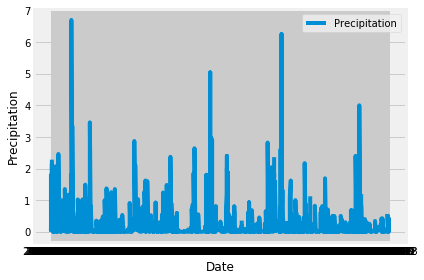

In [16]:
# Use Pandas Plotting with Matplotlib to plot the data
x_axis= prcp_df.index
y_axis = prcp_df["prcp"]

fig, ax = plt.subplots()

plt.plot(x_axis, y_axis)
plt.legend(["Precipitation"])
ax.set_xlabel("Date")
ax.set_ylabel("Precipitation")

plt.tight_layout()
plt.show()


In [17]:
# Use Pandas to calcualte the summary statistics for the precipitation data
prcp_df.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [18]:
# Design a query to show how many stations are available in this dataset?
num_station= session.query(Station.id).count()
print(num_station)

9


In [19]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.

stations= session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()

id_most = stations[0][0]
count_most = stations[0][1]
print(f"Station {id_most} has the highest number of observations: {count_most}")


Station USC00519281 has the highest number of observations: 2772


In [20]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?

temp=session.query(func.min(Measurement.tobs),func.max(Measurement.tobs),func.avg(Measurement.tobs)).\
    filter(Measurement.station == id_most).all()

print(temp)


[(54.0, 85.0, 71.66378066378067)]


In [21]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
high_temp_data= session.query(Measurement.date, Measurement.tobs).\
    filter(Measurement.station == id_most).\
    filter(Measurement.date>start_date).all()

high_temp_df = pd.DataFrame(high_temp_data).set_index('date')
high_temp_df.head()

,tobs
date,
2016-08-23,77.0
2016-08-24,77.0
2016-08-25,80.0
2016-08-26,80.0
2016-08-27,75.0


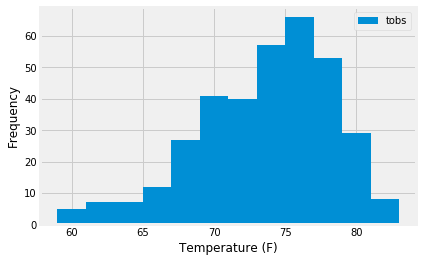

In [22]:
x=high_temp_df["tobs"]
fig, ax = plt.subplots()
plt.hist(x, bins = 12)
plt.ylabel("Frequency")
plt.xlabel("Temperature (F)")
plt.legend(["tobs"])
plt.show()

In [23]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [24]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
temp_trip = calc_temps('2017-02-06','2017-02-14')
print(temp_trip)

[(59.0, 69.86666666666666, 80.0)]


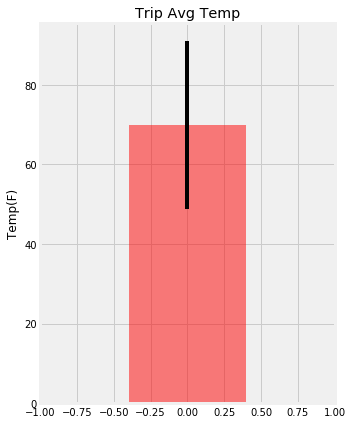

In [25]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
fig, ax = plt.subplots(figsize=(5,6))

plt.bar(0,temp_trip[0][1],yerr=temp_trip[0][2]-temp_trip[0][0],align="center",color="red",ecolor="black",
            alpha=0.5)
plt.xlim(-1, 1)
ax.set_title("Trip Avg Temp")
ax.set_ylabel("Temp(F)")
plt.tight_layout()
plt.show()

In [59]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation
rain=session.query(Measurement.station, Station.name, Station.latitude, Station.longitude,
                   Station.elevation, func.sum(Measurement.prcp)).\
                   filter(Measurement.station == Station.station).\
                   filter(Measurement.date>=dt.date(2017,2,6)).\
                   filter(Measurement.date<=dt.date(2017,2,14)).\
                   group_by(Measurement.station).order_by(func.sum(Measurement.prcp).desc()).all()

rain_df = pd.DataFrame(rain,columns=["Station ID","Station Name","Latitude","Longitude","Elevation","Precipitation Amount"])
rain_df.head()

,Station ID,Station Name,Latitude,Longitude,Elevation,Precipitation Amount
0,USC00513117,"KANEOHE 838.1, HI US",21.42340,-157.80150,14.6,7.31
1,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5,6.91
2,USC00519281,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9,6.22
3,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0,5.24
4,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4,4.36


## Optional Challenge Assignment

In [20]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [21]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


[(62.0, 69.15384615384616, 77.0),
 (60.0, 69.39622641509433, 77.0),
 (62.0, 68.9090909090909, 77.0),
 (58.0, 70.0, 76.0),
 (56.0, 67.96428571428571, 76.0),
 (61.0, 68.96491228070175, 76.0),
 (57.0, 68.54385964912281, 76.0)]

In [22]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


,tmin,tavg,tmax
date,,,
2018-01-01,62.0,69.153846,77.0
2018-01-02,60.0,69.396226,77.0
2018-01-03,62.0,68.909091,77.0
2018-01-04,58.0,70.000000,76.0
2018-01-05,56.0,67.964286,76.0


<IPython.core.display.Javascript object>


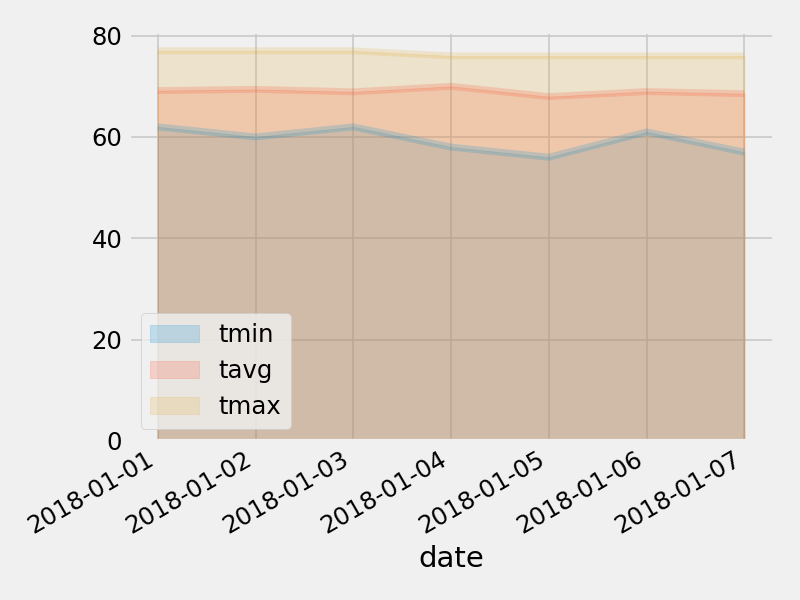

In [23]:
# Plot the daily normals as an area plot with `stacked=False`
